
# Семинар: Линейная регрессия. Задачи

### Задание: Линейная регрессия.

В этом задании мы рассмотрим метод линейной регрессии (метод наименьших квадратов - МНК). Мы будем работать с наборов данных, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 1.1.** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [51]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


В нашем наборе данных нет пропущенных значений.

**Задача 1.2.** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

В нашем наборе данных столбец 'Unnamed: 0' является индексом из CSV-файла, не несущим какой либо дополнительной информации, мы можем удалить его с помощью команды data.drop.

In [52]:
data = data.drop(columns=['Unnamed: 0'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 1.3.** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [53]:
corr_matrix = data.corr()
print(corr_matrix['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


Как можно заметить, признаки carat(вес), x(длина), y(ширина), z(глубина(конкретная)) бриллианта больше всего коррелируют с ценой.

**Задача 1.4.** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [54]:
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Мы создали новый DataFrame, где категориальные признаки ‘cut’, ‘color’ и ‘clarity’ были заменены на набор бинарных признаков - по одному для каждой категории исходного признака. Значение этих новых признаков стало равно 1, если в исходной строке была соответствующая категория, и 0 в противном случае.

**Задача 1.5.** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [55]:
from sklearn.model_selection import train_test_split

# Разделяем данные и целевую переменную
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Задача 1.6.** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [56]:
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Обучаем scaler на тренировочных данных и применяем к тренировочным и тестовым данным
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразовываем обратно в DataFrame для удобства
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())

      carat     depth     table         x         y         z  cut_Fair  \
0  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253 -0.175082   
1 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276 -0.175082   
2  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309 -0.175082   
3  0.021527  0.598537 -1.105327  0.164512  0.192898  0.251391 -0.175082   
4 -0.020530 -0.031445 -0.656213  0.182333  0.184176  0.181110 -0.175082   

   cut_Good  cut_Ideal  cut_Premium  ...   color_I   color_J  clarity_I1  \
0 -0.314881   1.227398    -0.585893  ... -0.333294 -0.234494   -0.117361   
1 -0.314881   1.227398    -0.585893  ... -0.333294 -0.234494   -0.117361   
2 -0.314881   1.227398    -0.585893  ... -0.333294 -0.234494   -0.117361   
3 -0.314881   1.227398    -0.585893  ... -0.333294 -0.234494   -0.117361   
4 -0.314881   1.227398    -0.585893  ...  3.000353 -0.234494   -0.117361   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0   -0.184885    -0.568

**Задача 1.7.** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем экземпляр LinearRegression
reg = LinearRegression()

# Обучаем модели на тренировочных данных
reg.fit(X_train_scaled, y_train)

# Предсказываем на тренировочной и тестовой выборках
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

# Вычисляем среднеквадратичные ошибки на тренировочной и тестовой выборках
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Выводим результаты
print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)

Среднеквадратичная ошибка на тренировочной выборке: 1290584.6285725816
Среднеквадратичная ошибка на тестовой выборке: 1244869.7976666358


**Задача 1.8.** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов (весов). Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [58]:
print(reg.coef_)

[ 5.33857794e+03 -9.03257900e+01 -6.13868713e+01 -1.09763005e+03
 -6.23947828e+00 -3.55971851e+01 -4.01856189e+14 -6.77689911e+14
 -1.15839951e+15 -1.03180240e+15 -9.88676127e+14  1.60072792e+15
  1.86443829e+15  1.85086752e+15  1.96221446e+15  1.75370393e+15
  1.45121560e+15  1.07531573e+15 -6.13837077e+14 -9.47924296e+14
 -2.27766492e+15 -1.98780183e+15 -1.90144901e+15 -2.22239444e+15
 -1.33543975e+15 -1.54066783e+15]


Text(0, 0.5, 'carat')

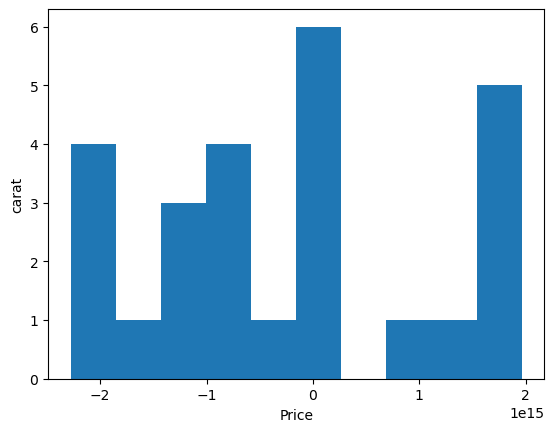

In [59]:
plt.hist(reg.coef_)
plt.xlabel('Price')
plt.ylabel('carat')

In [60]:
var_1 = data.columns[6]
var_2 = data.columns[7]
var_3 = data.columns[4]
print("Лучший коэффициент по модулю:", var_1)
print("2й коэффициент по модулю:", var_2)
print("3й коэффициент по модулю:", var_3)

Лучший коэффициент по модулю: price
2й коэффициент по модулю: x
3й коэффициент по модулю: depth


**Задача 1.9.** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, *между некоторыми признаками* имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности* (наличия линейной зависимости между объясняющими переменными (факторами) модели). Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно   
*либо исключить некоторые признаки из модели*,  
*либо использовать регуляризацию*.   
Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Выберите два признака, сильно коррелирующих между собой, и постройте зависимость (scatter) одного от другого.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

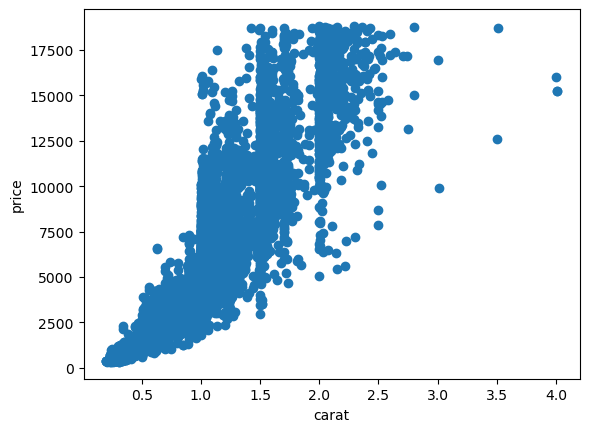

In [61]:
from sklearn.linear_model import Lasso, Ridge
plt.scatter(X_test['carat'], y_test)
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [62]:
# Обучаем Lasso-регрессии
lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)

# Обучаем Ridge-регрессии
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

# Получаем оценки коэффициентов
lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

# Выводим оценки коэффициентов
print("Lasso Coefficients:")
print(lasso_coef)
print("Ridge Coefficients:")
print(ridge_coef)

Lasso Coefficients:
[4872.15639556  -57.09361023  -47.68485714 -652.15744224   -0.
  -43.26536088 -126.50426086  -42.80932198   41.69581461    0.
   -0.          147.94933995   92.66322385   69.1393602    -0.
 -172.35946257 -279.01457714 -403.03069843 -488.72730006  194.05330182
 -252.3356645  -573.63563666  101.29825449   -0.          187.49926273
  193.99715195]
Ridge Coefficients:
[ 5.30128906e+03 -8.76398047e+01 -6.01236861e+01 -1.05722889e+03
 -9.60514861e+00 -3.80715442e+01 -1.25880000e+02 -4.14803547e+01
  5.19690360e+01  1.64495454e+01  1.54033128e+00  2.11055842e+02
  1.62246931e+02  1.39296135e+02  5.59072866e+01 -1.30202420e+02
 -2.50581034e+02 -3.86751101e+02 -4.73321397e+02  2.44575156e+02
 -1.47096586e+02 -4.91313752e+02  2.02359351e+02  1.02000447e+02
  2.54446988e+02  2.72034475e+02]


При использовании регрессии Лассо веса увеличились, при использования регрессии Риджа веса уменьшились. 

Проблема мультиколлинеарности сильно проявилась в изначальной регрессии, так как веса значительно уменьшились после применения регуляризации.

**Задача 3.10** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод сильнее уменьшает веса? 

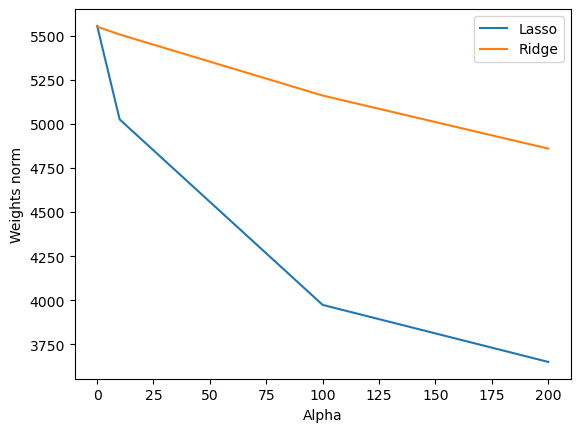

In [63]:
# Задаем значения параметра регуляризации
alphas = [0.1, 1, 10, 100, 200]

# Создаем списки для сохранения норм весов
lasso_norms = []
ridge_norms = []

# Обучаем Lasso и Ridge регрессии для каждого значения alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    
    lasso.fit(X_train_scaled, y_train)
    ridge.fit(X_train_scaled, y_train)
    
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))

# Строим график изменения нормы весов в зависимости от alpha
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Weights norm')
plt.legend()
plt.show()

Метод Лассо сильнее уменьшает веса, так как его кривая на графике быстрее убывает.